In [151]:
%matplotlib inline

In [152]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
creditdata = pd.read_csv("CreditData.txt", sep= ",", header=None)

In [4]:
creditdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [5]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 86.3+ KB


In [6]:
creditdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [7]:
columns = list(creditdata.columns.values)
columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [8]:
idx = np.any([creditdata.values == "?"])

In [9]:
idx

True

In [10]:
creditdata.columns
creditdata.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15      int64
dtype: object

In [11]:
creditdata.index

RangeIndex(start=0, stop=690, step=1)

In [12]:
creditdata = creditdata.replace('?', np.nan)

In [13]:
creditdata.loc[673,:].isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: 673, dtype: bool

In [14]:
creditdata.isnull().sum().sort_values(ascending = False)

13    13
1     12
0     12
6      9
5      9
4      6
3      6
15     0
14     0
12     0
11     0
10     0
9      0
8      0
7      0
2      0
dtype: int64

In [15]:
creditdata[creditdata.isnull().any(axis = 1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,0
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,0
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,0
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,1
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,1
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,1
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,1
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,0


In [16]:
creditdata[15]= creditdata[15].astype(object)

In [17]:
creditdata[1] = creditdata[1].astype(float)
creditdata[13] = creditdata[13].astype(float)

In [18]:
#13float,1float,0object,6object,5object,4object,3object

In [19]:
creditdata[13].fillna(creditdata[13].mean(), inplace = True)
creditdata[1].fillna(creditdata[1].mean(), inplace = True)

In [20]:
creditdata[3].value_counts()

u    519
y    163
l      2
Name: 3, dtype: int64

In [21]:
creditdata[0] = creditdata[0].fillna('b')

In [22]:
creditdata[6] = creditdata[6].fillna('v')
creditdata[5] = creditdata[5].fillna('c')
creditdata[4] = creditdata[4].fillna('g')
creditdata[3] = creditdata[3].fillna('u')

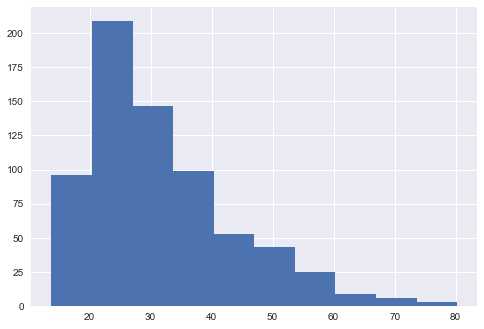

In [23]:
creditdata[1].hist()

In [24]:
numeric_clmns = creditdata.dtypes[creditdata.dtypes != "object"].index 

In [25]:
numeric_clmns

Int64Index([1, 2, 7, 10, 13, 14], dtype='int64')

In [26]:
creditdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [27]:
creditdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [28]:
creditdata[0].value_counts()#gender

b    480
a    210
Name: 0, dtype: int64

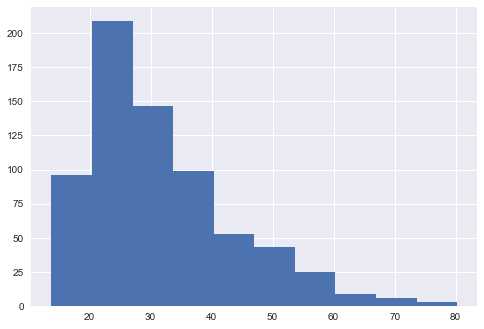

In [29]:
creditdata[1].hist() #Age

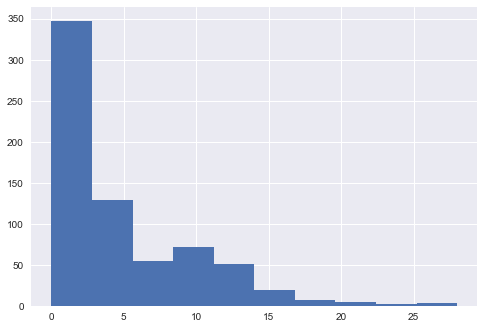

In [30]:
creditdata[2].hist() #employed years

In [31]:
creditdata[3].value_counts() #Married

u    525
y    163
l      2
Name: 3, dtype: int64

In [32]:
creditdata[4].value_counts() #children/family

g     525
p     163
gg      2
Name: 4, dtype: int64

In [33]:
creditdata[5].value_counts() #education level

c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

In [34]:
creditdata[6].value_counts() #type of card applied

v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64

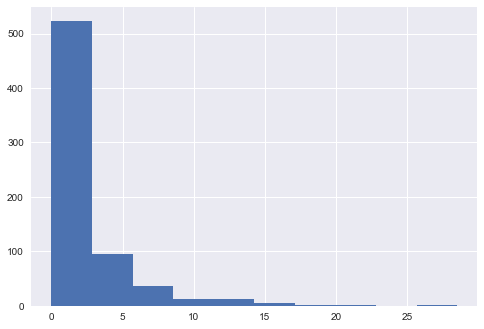

In [35]:
#13 credit score, 14 income
creditdata[7].hist() #credit years

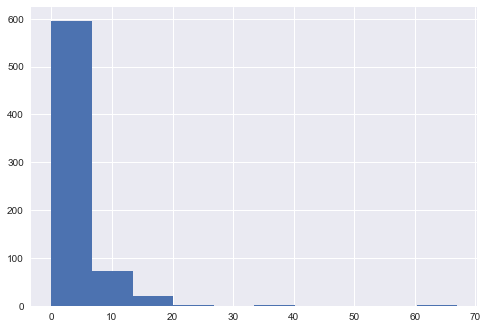

In [36]:
creditdata[10].hist() #payment history

In [37]:
creditdata[8].value_counts() #Employed

t    361
f    329
Name: 8, dtype: int64

In [38]:
creditdata[9].value_counts() #Public asssistance

f    395
t    295
Name: 9, dtype: int64

In [39]:
creditdata[11].value_counts() #loan default

f    374
t    316
Name: 11, dtype: int64

In [40]:
creditdata[12].value_counts() #citizen

g    625
s     57
p      8
Name: 12, dtype: int64

In [41]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null float64
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null float64
14    690 non-null int64
15    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [42]:
creditdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [43]:
creditdata.rename(columns= {0: "Gender", 1:"Age", 2:"Years of Employment", 3:"Married", 4:"Children", 5:"Education level", 6:"Type of card applied", 7:"Years of credit usage", 8:"Employed", 9:"Public Assistance", 10:"Payment history", 11:"Loan Default", 12:"Citizen", 13:"Credit Score", 14:"Income", 15:"Credit Approval"}, inplace=True)

In [44]:
numdata = creditdata.select_dtypes(include= ['int64', 'float64'])

In [45]:
numdata.head()

,Age,Years of Employment,Years of credit usage,Payment history,Credit Score,Income
0,30.83,0.000,1.25,1,202.0,0
1,58.67,4.460,3.04,6,43.0,560
2,24.50,0.500,1.50,0,280.0,824
3,27.83,1.540,3.75,5,100.0,3
4,20.17,5.625,1.71,0,120.0,0


In [46]:
catdata = creditdata.select_dtypes(include= ['object'])

In [47]:
catdata.head()

,Gender,Married,Children,Education level,Type of card applied,Employed,Public Assistance,Loan Default,Citizen,Credit Approval
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


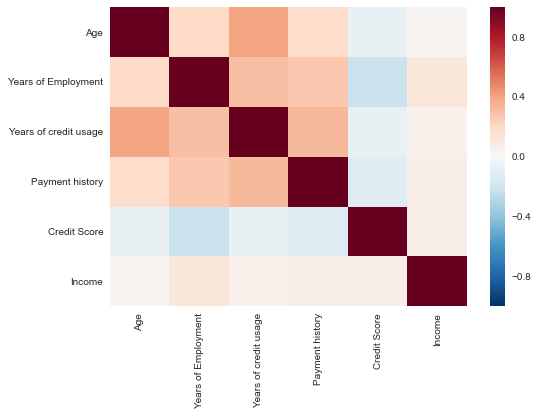

In [48]:
corr = creditdata.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [49]:
corr

,Age,Years of Employment,Years of credit usage,Payment history,Credit Score,Income
Age,1.000000,0.201316,0.392787,0.185575,-0.077161,0.018539
Years of Employment,0.201316,1.000000,0.298902,0.271207,-0.222346,0.123121
Years of credit usage,0.392787,0.298902,1.000000,0.322330,-0.076389,0.051345
Payment history,0.185575,0.271207,0.322330,1.000000,-0.119809,0.063692
Credit Score,-0.077161,-0.222346,-0.076389,-0.119809,1.000000,0.065609
Income,0.018539,0.123121,0.051345,0.063692,0.065609,1.000000


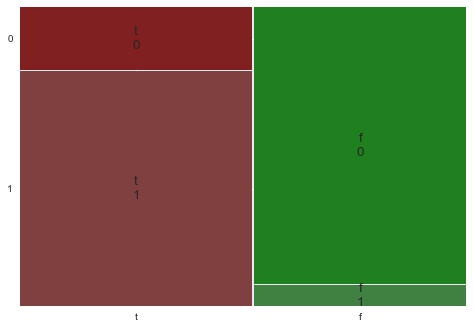

In [50]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(creditdata, ['Employed', 'Credit Approval']);


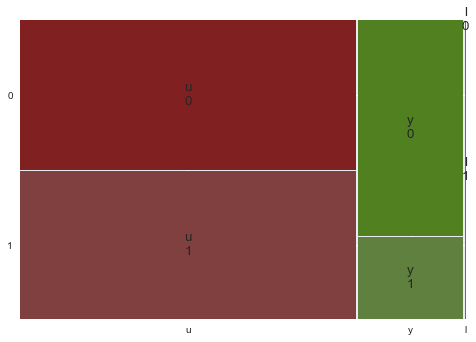

In [51]:
plt.rcParams['font.size'] = 16.0
mosaic(creditdata, ['Married', 'Credit Approval']);


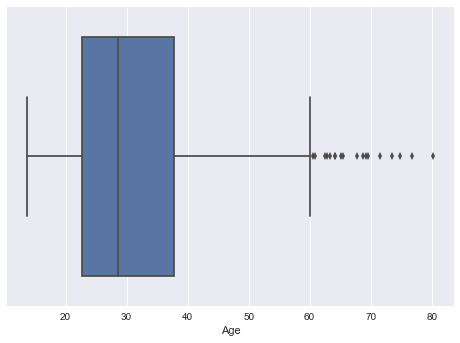

In [52]:
sns.boxplot(creditdata.Age)

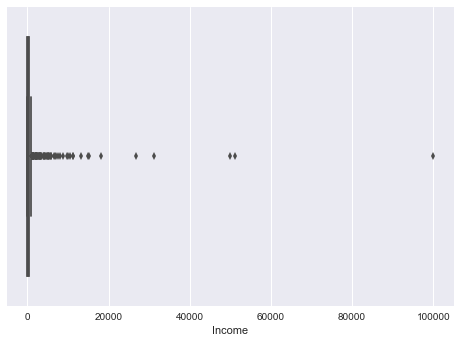

In [53]:
sns.boxplot(creditdata.Income)

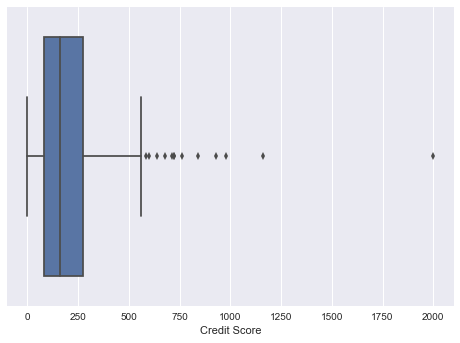

In [54]:
sns.boxplot(creditdata['Credit Score'])

C:\Users\eswarjal09\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


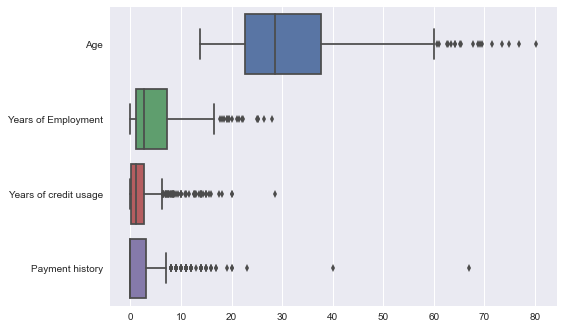

In [55]:
sns.boxplot(creditdata.iloc[:,0:13], orient= "h")

In [56]:
creditcard2 = creditdata
creditcard2.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [57]:
for i in range(0,690,5):
    creditcard2.loc[i, "Age"] = np.NaN
    

In [58]:
#from sklearn.preprocessing import Imputer

In [59]:
#imp = Imputer()

In [60]:
#imp.fit(creditcard2.Age)

In [61]:
#imp.transform(creditcard2.Age)

In [62]:
#sns.boxplot(creditcard2.Age)

In [63]:
for i in range(0,690,5):
    creditcard2.loc[i, "Years of Employment"] = np.NaN

In [64]:
#imp.fit(creditcard2["Years of Employment"])

In [65]:
#imp.transform(creditcard2["Years of Employment"]).reshape(-1,1)

In [66]:
#sns.boxplot(creditcard2["Years of Employment"])

In [67]:
for i in range(0,690,5):
    creditcard2.loc[i, "Years of credit usage"] = np.NaN
#imp.fit(creditcard2["Years of credit usage"])
#imp.transform(creditcard2["Years of credit usage"]).reshape(-1,1)
#sns.boxplot(creditcard2["Years of credit usage"])

In [68]:
for i in range(0,690,5):
    creditcard2.loc[i, "Credit Score"] = np.NaN

In [69]:
for i in range(0,690,5):
    creditcard2.loc[i, "Payment history"] = np.NaN
#imp.fit(creditcard2["Payment history"])
#imp.transform(creditcard2["Payment history"]).reshape(-1,1)
#sns.boxplot(creditcard2["Payment history"])

In [70]:
for i in range(0,690,5):
    creditcard2.loc[i, "Income"] = np.NaN

In [71]:
creditcard2.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,NaN,NaN,u,g,w,v,NaN,t,t,NaN,f,g,NaN,NaN,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [72]:
catdata1 = catdata.drop(["Credit Approval"], axis=1)
catdata1 = pd.get_dummies(catdata1)

In [73]:
catdata.head()

,Gender,Married,Children,Education level,Type of card applied,Employed,Public Assistance,Loan Default,Citizen,Credit Approval
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


In [74]:
from sklearn import preprocessing
minmaxscaler = preprocessing.MinMaxScaler()
nmscaled = minmaxscaler.fit_transform(numdata)
numdata1 = pd.DataFrame(nmscaled)

In [75]:
numdata1 = pd.DataFrame(numdata1, numdata.columns)

In [76]:
totdata = pd.concat((numdata,catdata1, catdata["Credit Approval"]), axis = 1)

In [77]:
creditcard2.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,NaN,NaN,u,g,w,v,NaN,t,t,NaN,f,g,NaN,NaN,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [78]:
def impute_mean(series):
    return series.fillna(series.mean())


In [79]:
creditcard2.Age = impute_mean(creditcard2.Age)

In [80]:
creditcard2["Years of Employment"] = impute_mean(creditcard2["Years of Employment"])

In [81]:
creditcard2["Years of credit usage"] = impute_mean(creditcard2["Years of credit usage"])

In [82]:
creditcard2["Payment history"] = impute_mean(creditcard2["Payment history"])

In [83]:
creditcard2["Credit Score"] = impute_mean(creditcard2["Credit Score"])

In [84]:
creditcard2["Income"] = impute_mean(creditcard2["Income"])

In [85]:
import knnimpute

In [86]:
creditcard3 = creditcard2
creditcard3.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,31.249575,4.641277,u,g,w,v,2.189547,t,t,2.38587,f,g,183.49121,985.213768,1
1,a,58.670000,4.460000,u,g,q,h,3.040000,t,t,6.00000,f,g,43.00000,560.000000,1
2,a,24.500000,0.500000,u,g,q,h,1.500000,t,f,0.00000,f,g,280.00000,824.000000,1
3,b,27.830000,1.540000,u,g,w,v,3.750000,t,t,5.00000,t,g,100.00000,3.000000,1
4,b,20.170000,5.625000,u,g,w,v,1.710000,t,f,0.00000,f,s,120.00000,0.000000,1


In [87]:
def impute_median(series):
    return(series.fillna(series.median()))

In [88]:
creditcard3["Years of Employment"] = impute_median(creditcard3["Years of Employment"])
creditcard3["Years of credit usage"] = impute_median(creditcard3["Years of credit usage"])
creditcard3["Payment history"] = impute_median(creditcard3["Payment history"])
creditcard3["Credit Score"] = impute_median(creditcard3["Credit Score"])
creditcard3["Income"] = impute_median(creditcard3["Income"])

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV

C:\Users\eswarjal09\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
target = totdata["Credit Approval"]
totdata = totdata.drop("Credit Approval", axis=1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(totdata, target, test_size = 0.25, random_state = 42)

In [92]:
kf = KFold(X_train.shape[0], n_folds=10, random_state=1)
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=kf, scoring= 'accuracy')

In [93]:
y_train = pd.Series(y_train)
y_train = y_train.astype('category')

In [94]:
clf.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=517, n_folds=10, shuffle=False, random_state=1),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [95]:
predictions = clf.predict(X_test)
y_test = y_test.astype('int')


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [97]:
y_test.shape

(173,)

In [231]:
log_acc = accuracy_score(y_test, predictions)

In [103]:
#roc_auc = roc_auc_score(y_test, predictions1)

In [104]:
#roc_plot = roc_curve(y_test, predictions1)

In [105]:
#acc(Logistic Regression) = 84.97

In [106]:
creditcard2.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,31.249575,4.641277,u,g,w,v,2.189547,t,t,2.38587,f,g,183.49121,985.213768,1
1,a,58.670000,4.460000,u,g,q,h,3.040000,t,t,6.00000,f,g,43.00000,560.000000,1
2,a,24.500000,0.500000,u,g,q,h,1.500000,t,f,0.00000,f,g,280.00000,824.000000,1
3,b,27.830000,1.540000,u,g,w,v,3.750000,t,t,5.00000,t,g,100.00000,3.000000,1
4,b,20.170000,5.625000,u,g,w,v,1.710000,t,f,0.00000,f,s,120.00000,0.000000,1


In [107]:
creditcard3.head()

,Gender,Age,Years of Employment,Married,Children,Education level,Type of card applied,Years of credit usage,Employed,Public Assistance,Payment history,Loan Default,Citizen,Credit Score,Income,Credit Approval
0,b,31.249575,4.641277,u,g,w,v,2.189547,t,t,2.38587,f,g,183.49121,985.213768,1
1,a,58.670000,4.460000,u,g,q,h,3.040000,t,t,6.00000,f,g,43.00000,560.000000,1
2,a,24.500000,0.500000,u,g,q,h,1.500000,t,f,0.00000,f,g,280.00000,824.000000,1
3,b,27.830000,1.540000,u,g,w,v,3.750000,t,t,5.00000,t,g,100.00000,3.000000,1
4,b,20.170000,5.625000,u,g,w,v,1.710000,t,f,0.00000,f,s,120.00000,0.000000,1


In [108]:
from sklearn import svm

In [109]:
clf = svm.SVC(kernel= 'linear')

In [110]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
pred_svm = clf.predict(X_test)

In [232]:
acc_svm = accuracy_score(y_test, pred_svm)

In [113]:
#svm radial kernel acc : 0.554
#svm linear kernel acc: 0.826

In [114]:
from sklearn import tree

In [115]:
clf = tree.DecisionTreeClassifier()

In [116]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [117]:
pred_tree = clf.predict(X_test)

In [233]:
acc_tree = accuracy_score(y_test, pred_tree)

In [119]:
#decisiontree 0.7919

In [120]:
import lightgbm as lgb

In [121]:
gbm = lgb.LGBMClassifier()

In [122]:
gbm.fit(X_train, y_train)

C:\Users\eswarjal09\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\eswarjal09\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=10,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [123]:
pred_gbm = gbm.predict(X_test)

In [234]:
acc_gbm = accuracy_score(y_test, pred_gbm)

In [125]:
#lightgbm 0.861

In [132]:
numdata2 = creditcard2.select_dtypes(include= ('int64', 'float64'))

In [133]:
catdata2 = creditcard2.select_dtypes(include= ['object'])

In [135]:
catdata2.head()

,Gender,Married,Children,Education level,Type of card applied,Employed,Public Assistance,Loan Default,Citizen,Credit Approval
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


In [136]:
target2 = catdata2["Credit Approval"]

In [137]:
catdata2 = catdata2.drop("Credit Approval", axis=1)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
std = StandardScaler()

In [140]:
numdata2 = std.fit_transform(numdata2)

In [142]:
numdata2 = pd.DataFrame(numdata2)

In [143]:
numdata2.head()

,0,1,2,3,4,5
0,2.084516e-15,-4.087167e-16,-4.487541e-16,0.000000,0.000000,0.000000
1,2.681439e+00,-4.170953e-02,2.864621e-01,0.810237,-0.876996,-0.089701
2,-6.600398e-01,-9.528543e-01,-2.322634e-01,-0.534878,0.602442,-0.034009
3,-3.343996e-01,-7.135638e-01,5.256148e-01,0.586051,-0.521182,-0.207204
4,-1.083470e+00,2.263419e-01,-1.615281e-01,-0.534878,-0.396335,-0.207837


In [144]:
catdata2 = pd.get_dummies(catdata2)

In [146]:
totdata2 = pd.concat((numdata2, catdata2),axis=1 )

In [147]:
totdata2.head()

,0,1,2,3,4,5,Gender_a,Gender_b,Married_l,Married_u,...,Type of card applied_z,Employed_f,Employed_t,Public Assistance_f,Public Assistance_t,Loan Default_f,Loan Default_t,Citizen_g,Citizen_p,Citizen_s
0,2.084516e-15,-4.087167e-16,-4.487541e-16,0.000000,0.000000,0.000000,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,2.681439e+00,-4.170953e-02,2.864621e-01,0.810237,-0.876996,-0.089701,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,-6.600398e-01,-9.528543e-01,-2.322634e-01,-0.534878,0.602442,-0.034009,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,-3.343996e-01,-7.135638e-01,5.256148e-01,0.586051,-0.521182,-0.207204,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,-1.083470e+00,2.263419e-01,-1.615281e-01,-0.534878,-0.396335,-0.207837,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [148]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(totdata2, target2, test_size = 0.25, random_state = 43)

In [150]:
x_train1.shape

(517, 46)

In [168]:
class SklearnHelper(object):
    def __init__ (self, clf, seed, params = None):
        params['random_state'] = seed
        self.clf = clf(**params)
    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)
    def predict(self, X_test):
        self.clf.predict(X_test)

    

In [169]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [184]:
rf = RandomForestClassifier()

In [185]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [186]:
pred_rf = rf.predict(X_test)

In [235]:
acc_rf = accuracy_score(pred_rf, y_test)

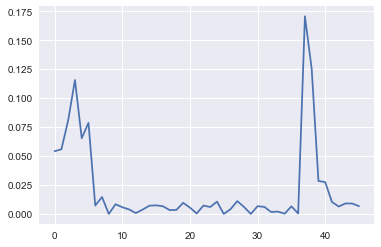

In [196]:
plt.plot(rf.feature_importances_)

In [226]:
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in rf.estimators_], axis=0)
importance = importance.sort(columns= "Importance", ascending=False)
importance = importance.iloc[0:5, :]
x = importance.index
y = importance.loc[:, "Importance"]


C:\Users\eswarjal09\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [228]:
cols = ["Employed_f", "Employed_t", "Payment history", "Years of credit usage", "Income"]

In [255]:
#random forest acc 0.8381
X_train.shape

(517, 46)

In [251]:
acc = {'model': ['Logistic Regression', 'svm', 'Decision tree', 'gbm', 'random forest'], 
                   'accuracy' : [log_acc, acc_svm, acc_tree, acc_gbm, acc_rf]}
acc = pd.DataFrame.from_dict(acc)

In [252]:
acc

,accuracy,model
0,0.849711,Logistic Regression
1,0.826590,svm
2,0.791908,Decision tree
3,0.861272,gbm
4,0.838150,random forest


In [253]:
import tensorflow as tf

In [254]:
n_nodes_h1 =  100
n_classes = 2
batch_size = 30

In [261]:
x = tf.placeholder('float', [None,46])
y = tf.placeholder('float')
hidden_layer_1 = {'weights': tf.Variable(tf.random_normal([46, n_nodes_h1])),
                  'biases': tf.Variable(tf.random_normal([n_nodes_h1])) }
output_layer =  {'weights': tf.Variable(tf.random_normal([n_nodes_h1, n_classes])),
                  'biases': tf.Variable(tf.random_normal([n_classes])) }
l1 = tf.add(tf.matmul(X_train, hidden_layer_1["weights"]) , hidden_layer_1["biases"])
l1 = tf.nn.sigmoid(l1)
output = tf.add(tf.matmul(l1, output_layer['weights']), output_layer['biases'])


In [262]:
output

<tf.Tensor 'Add_2:0' shape=(517, 2) dtype=float32>

In [282]:
class Dataset:

    def __init__(self,data):
        self._index_in_epoch = 0
        self._epochs_completed = 0
        self._data = data
        self._num_examples = data.shape[0]
        pass


    @property
    def data(self):
        return self._data

    def next_batch(self,batch_size,shuffle = True):
        start = self._index_in_epoch
        if start == 0 and self._epochs_completed == 0:
            idx = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexe
            self._data = self.data[idx]  # get list of `num` random samples

        # go to the next batch
        if start + batch_size > self._num_examples:
            self._epochs_completed += 1
            rest_num_examples = self._num_examples - start
            data_rest_part = self.data[start:self._num_examples]
            idx0 = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx0)  # shuffle indexes
            self._data = self.data[idx0]  # get list of `num` random samples

            start = 0
            self._index_in_epoch = batch_size - rest_num_examples #avoid the case where the #sample != integar times of batch_size
            end =  self._index_in_epoch  
            data_new_part =  self._data[start:end]  
            return np.concatenate((data_rest_part, data_new_part), axis=0)
        else:
            self._index_in_epoch += batch_size
            end = self._index_in_epoch
            return self._data[start:end]


In [286]:
prediction = output

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [288]:
from keras.models import Sequential
from keras.layers import Dense

In [309]:
model = Sequential()
model.add(Dense(units= 80, activation= 'sigmoid', input_dim = 46))
model.add(Dense(units= 1, activation= 'sigmoid'))

In [310]:
model.compile(loss= 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [312]:
xtrain1 = np.array(X_train)

model.fit(xtrain1, y_train, epochs= 40)

Epoch 1/40
517/517 [==============================] - 0s - loss: 0.3840 - acc: 0.8569     
Epoch 2/40
517/517 [==============================] - 0s - loss: 0.3981 - acc: 0.8395     
Epoch 3/40
517/517 [==============================] - 0s - loss: 0.3785 - acc: 0.8530     
Epoch 4/40
517/517 [==============================] - 0s - loss: 0.3730 - acc: 0.8569     
Epoch 5/40
517/517 [==============================] - 0s - loss: 0.3715 - acc: 0.8530     
Epoch 6/40
517/517 [==============================] - 0s - loss: 0.3671 - acc: 0.8627     

In [314]:
X_test.shape

(173, 46)

In [315]:
xtest = np.array(X_test)

In [316]:
pred_nn = model.predict(xtest)

In [319]:
pred_nn[pred_nn > 0.5] = 1
pred_nn[pred_nn <= 0.5] = 0

In [320]:
accuracy_score(pred_nn, y_test)

0.84393063583815031

In [321]:
# neural nets acc 0.84393